# Лабораторная работа 205: Магнитное поле соленоида

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as polt
from matplotlib.ticker import AutoMinorLocator
from scipy import interpolate

n: int = 600
r_1: float = 4.25
mu_0: float = 4 * np.pi * 10**(-7)

frequency: int = 50

In [10]:
U_all = np.array([[90.34, 107.94, 121.6, 131.4, 137.4, 142.5, 144.93, 146.18, 147.15, 147.25, 146.20, 145.54, 144.04, 142.21, 138.52, 132.05, 122.22, 104.61, 86.20, 61.45, 54.62, 40.71, 30.45, 25.07, 14.47, 9.84, 7.03, 5.35, 4.48, 3.53, 2.96, 2.28],
                [70.00,
      83.82,
      94.00,
      101.61,
      106.05,
      109.09,
      110.87,
      111.73,
      112.30,
      112.14,
      111.86,
      110.96,
      109.47,
      107.12,
      103.69,
      98.26,
      89.86,
      76.04,
      61.82,
      47.20,
      32.18,
      23.48,
      16.38,
      12.70,
      9.81,
      7.42,
      5.71,
      4.68,
      3.87,
      3.05,
      2.53,
      2.11],
                [0.32,
      0.30,
      0.28,
      0.25,
      0.25,
      0.25,
      0.25,
      0.25,
      0.25,
      0.25,
      0.25,
      0.25,
      0.25,
      0.24,
      0.25,
      0.25,
      0.25,
      0.25,
      0.6,
      6.31,
      55.27,
      60.84,
      43.18,
      31.80,
      22.04,
      15.28,
      11.83,
      9.45,
      7.47,
      6.01,
      4.90,
      4.00]
                ]) * 10 ** -3

I1 = 1      # Для дерева и алюминия
I2 = 0.25   # Для стали
N = 3000    # Витки
R = 3.8     # Радиус (см)
L = 20      # Длина катушки

# перевели обратно в мВ, чтобы табличку отобразить
df = pd.DataFrame(np.transpose(U_all) * 1000, columns = ["Дерево, мВ", "Алюминий, мВ", "Сталь, мВ"])
df

,"Дерево, мВ","Алюминий, мВ","Сталь, мВ"
0,90.34,70.00,0.32
1,107.94,83.82,0.30
2,121.60,94.00,0.28
3,131.40,101.61,0.25
4,137.40,106.05,0.25
5,142.50,109.09,0.25
6,144.93,110.87,0.25
7,146.18,111.73,0.25
8,147.15,112.30,0.25
9,147.25,112.14,0.25


In [4]:
Defer[Subscript[B, 0] = (Sqrt[2]*U) / (2 * Pi^2 * n * \[Nu] * r^2 * Subscript[\[Mu], 0])]

SyntaxError: unexpected character after line continuation character (1746926686.py, line 1)

N         l                L - l
Defer[B = μ  J --- (------------- + -------------------)]
           0   2 L        2    2                2    2
                    Sqrt[l  + R ]   Sqrt[(L - l)  + R ]
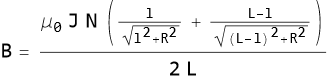

In [ ]:
Defer[B = Subscript[\[Mu], 0] * J * N/(2 L) * (l/Sqrt[l^2 + R^2] + (L - l)/Sqrt[(L - l)^2 + R^2])]

In [ ]:
B_0 = U_all * 2**0.5 / (2 * np.pi**2 * n * frequency * r_1**2 * mu_0)

l_max: int = 31

fig, axs = polt.subplots(1, 1, figsize=(12, 6))
l_axis = np.linspace(0, l_max, 200)

axs.set_title("Зависимость B(l)")
axs.set_xlabel("l, см")
axs.set_ylabel("B, Тл")

# построение зависимостей для дерева, алюминия и стали
graphics_labels = np.array(["Дерево", "Алюминий", "Сталь"])
for i in range(len(graphics_labels)):
    cubic = interpolate.interp1d(range(0, l_max + 1), B_0[i], kind="cubic")
    B_axis = cubic(l_axis)
    axs.scatter(range(0, l_max + 1), B_0[i], s=7, color="black")
    axs.plot(l_axis, B_axis, label=graphics_labels[i])

# теоретическая зависимость маг. индукции от длины
B_axis = mu_0 * I1 * N/(2 *(L/100)) *(l_axis/(l_axis**2+R**2)**0.5 + (L-l_axis)/((L-l_axis)**2+R**2)**0.5)
axs.plot(l_axis, B_axis, label="Теория", color="black")

# легенда графиков
axs.legend()

# насечки на графике
axs.minorticks_on()
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

# клеточки на фоне
polt.grid(which='minor', linestyle='--', linewidth=0.4)
polt.grid(which='major', linewidth=0.6)